# 1.Company Dataset

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
company = pd.read_csv('Company_Data.csv')
company1 = company.copy()
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company1.shape

(400, 11)

In [4]:
company1.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
company.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


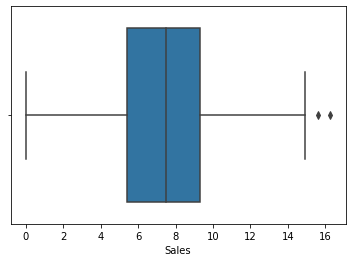

In [9]:
#Check for outliers
ax = sns.boxplot(company1['Sales'])

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


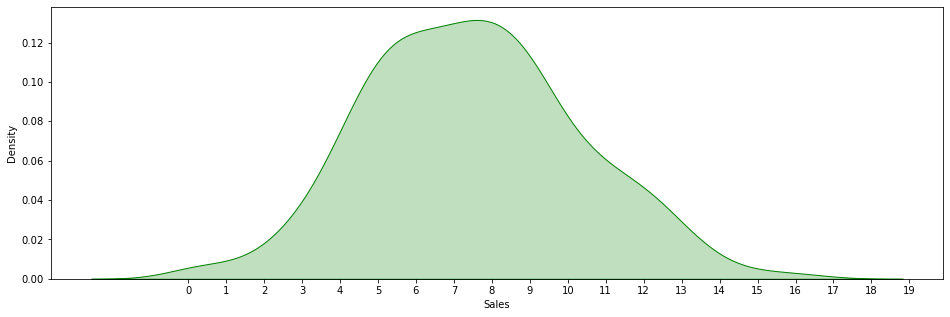

In [10]:
#Data has 2 outlier instances
plt.rcParams["figure.figsize"] = 9,5

plt.figure(figsize=(16,5))
print("Skew: {}".format(company1['Sales'].skew()))
print("Kurtosis: {}".format(company1['Sales'].kurtosis()))
ax = sns.kdeplot(company1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

Here the data is Skewed on the right, so thehe data has negative Kurtosis.

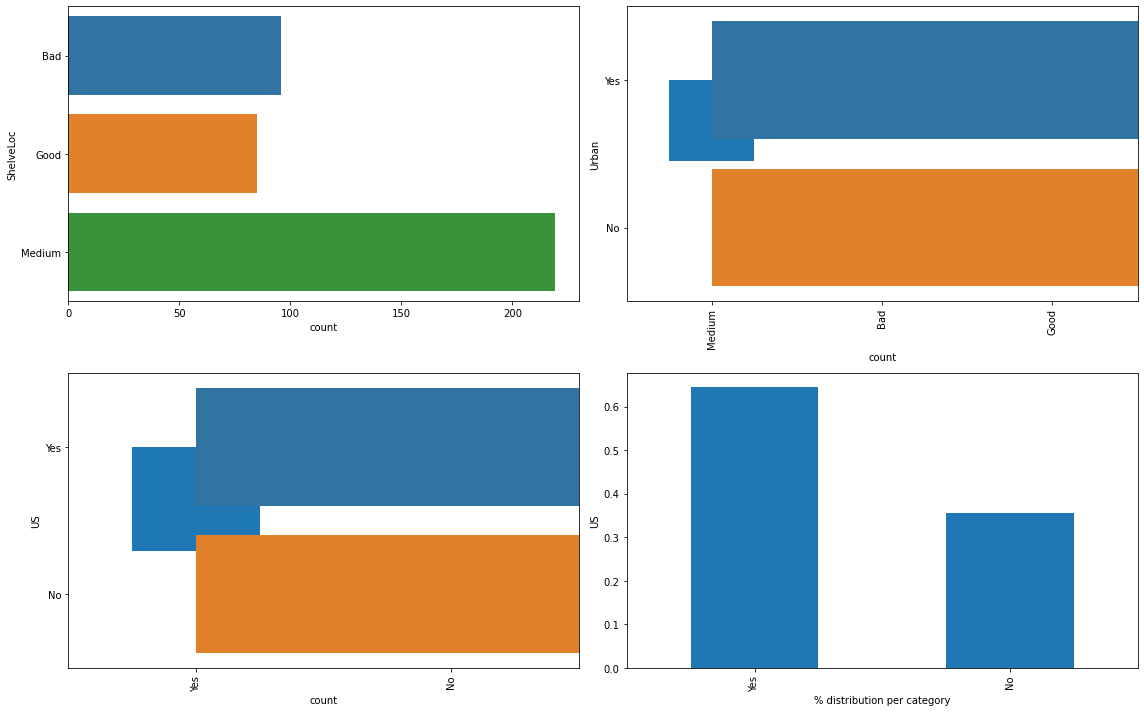

In [11]:
obj_colum = company1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=company1,y=col)
    plt.subplot(2,2,i+1)
    company1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

DATA VISUALIZATION

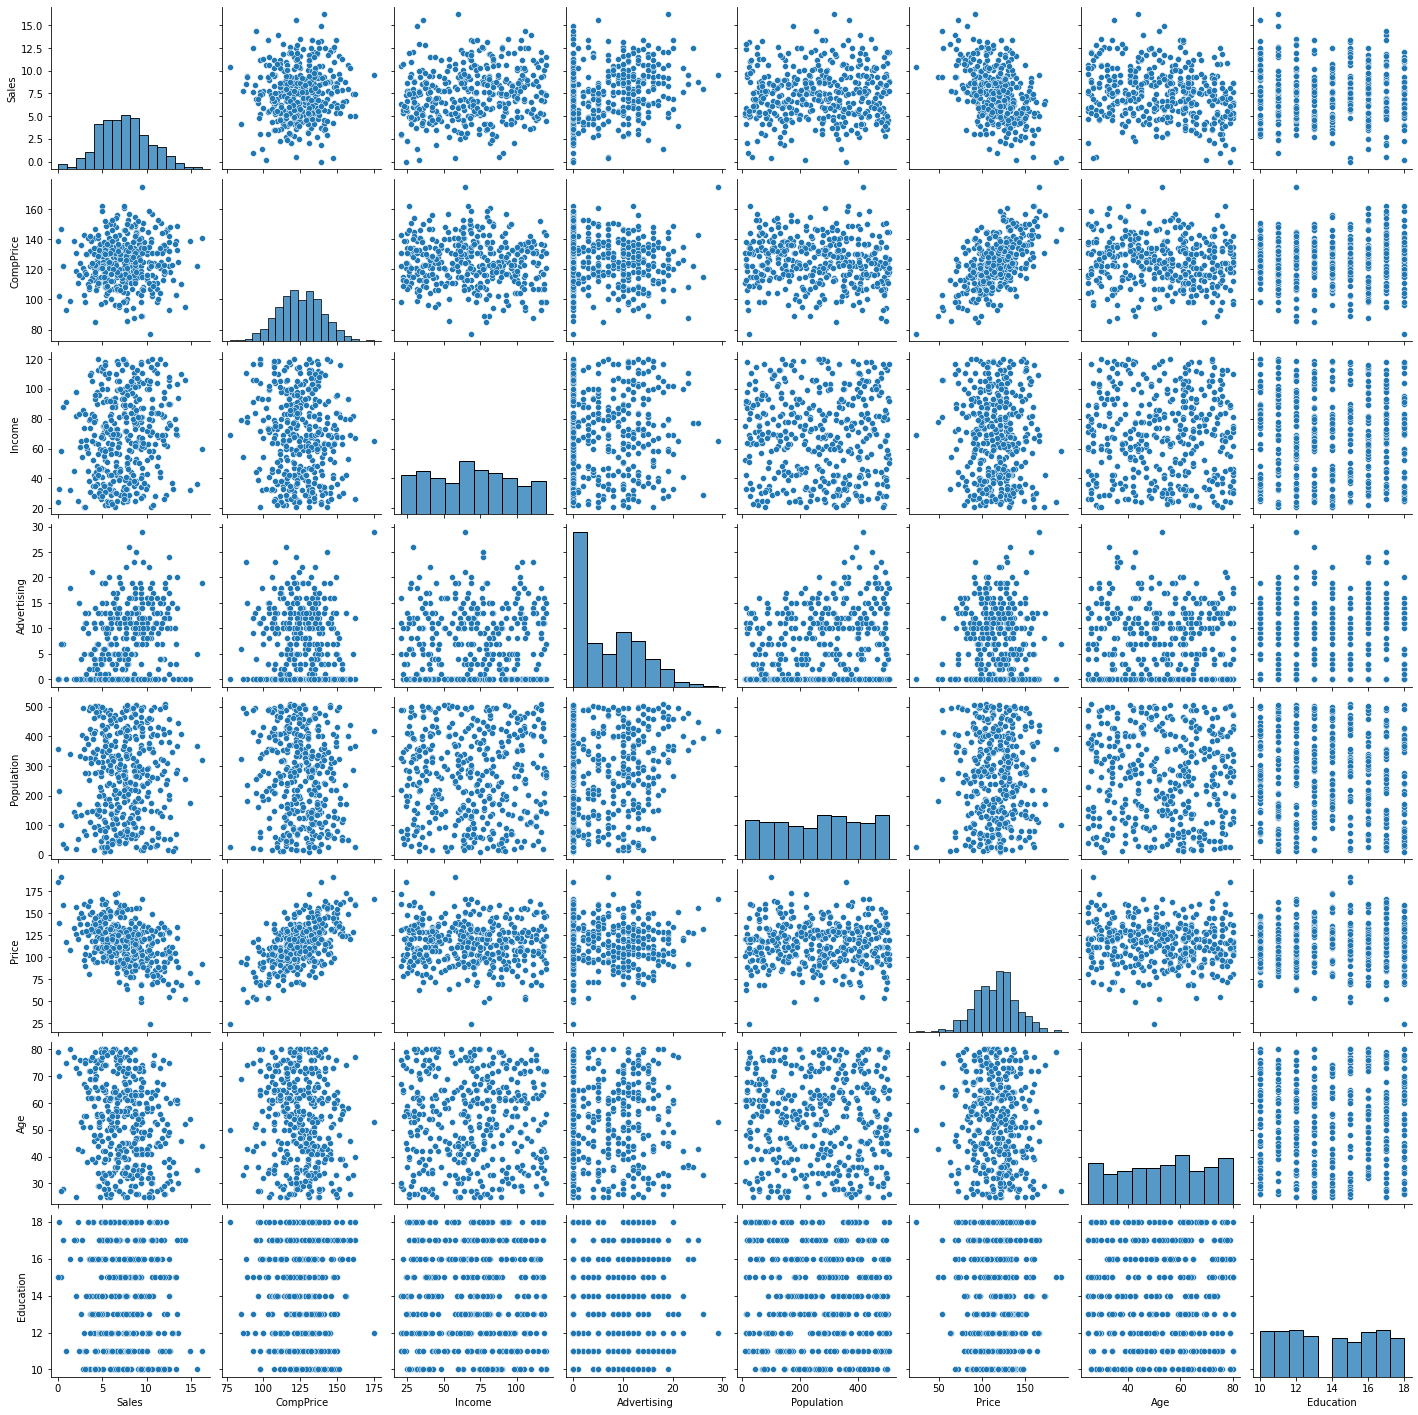

In [12]:
sns.pairplot(company1)

<AxesSubplot:xlabel='Sales', ylabel='Income'>

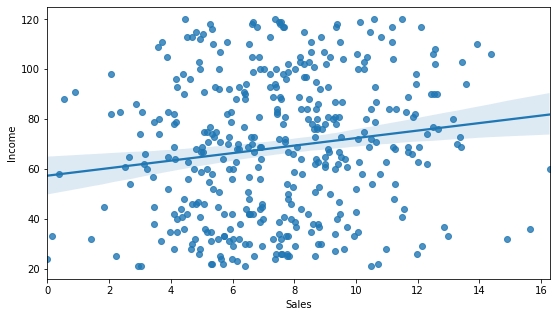

In [13]:
#regplot of sales vs income
sns.regplot('Sales','Income', data=company1)  

<AxesSubplot:>

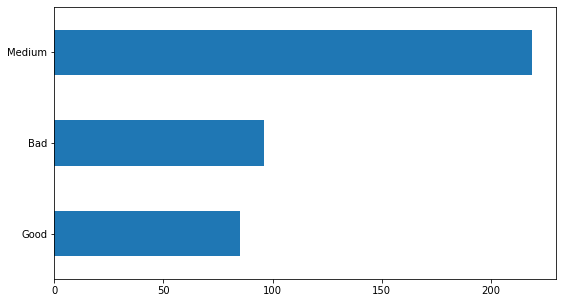

In [14]:
company1.ShelveLoc.value_counts(ascending=True).plot(kind='barh')

In [15]:
num_columns = company1.select_dtypes(exclude='object').columns.tolist()

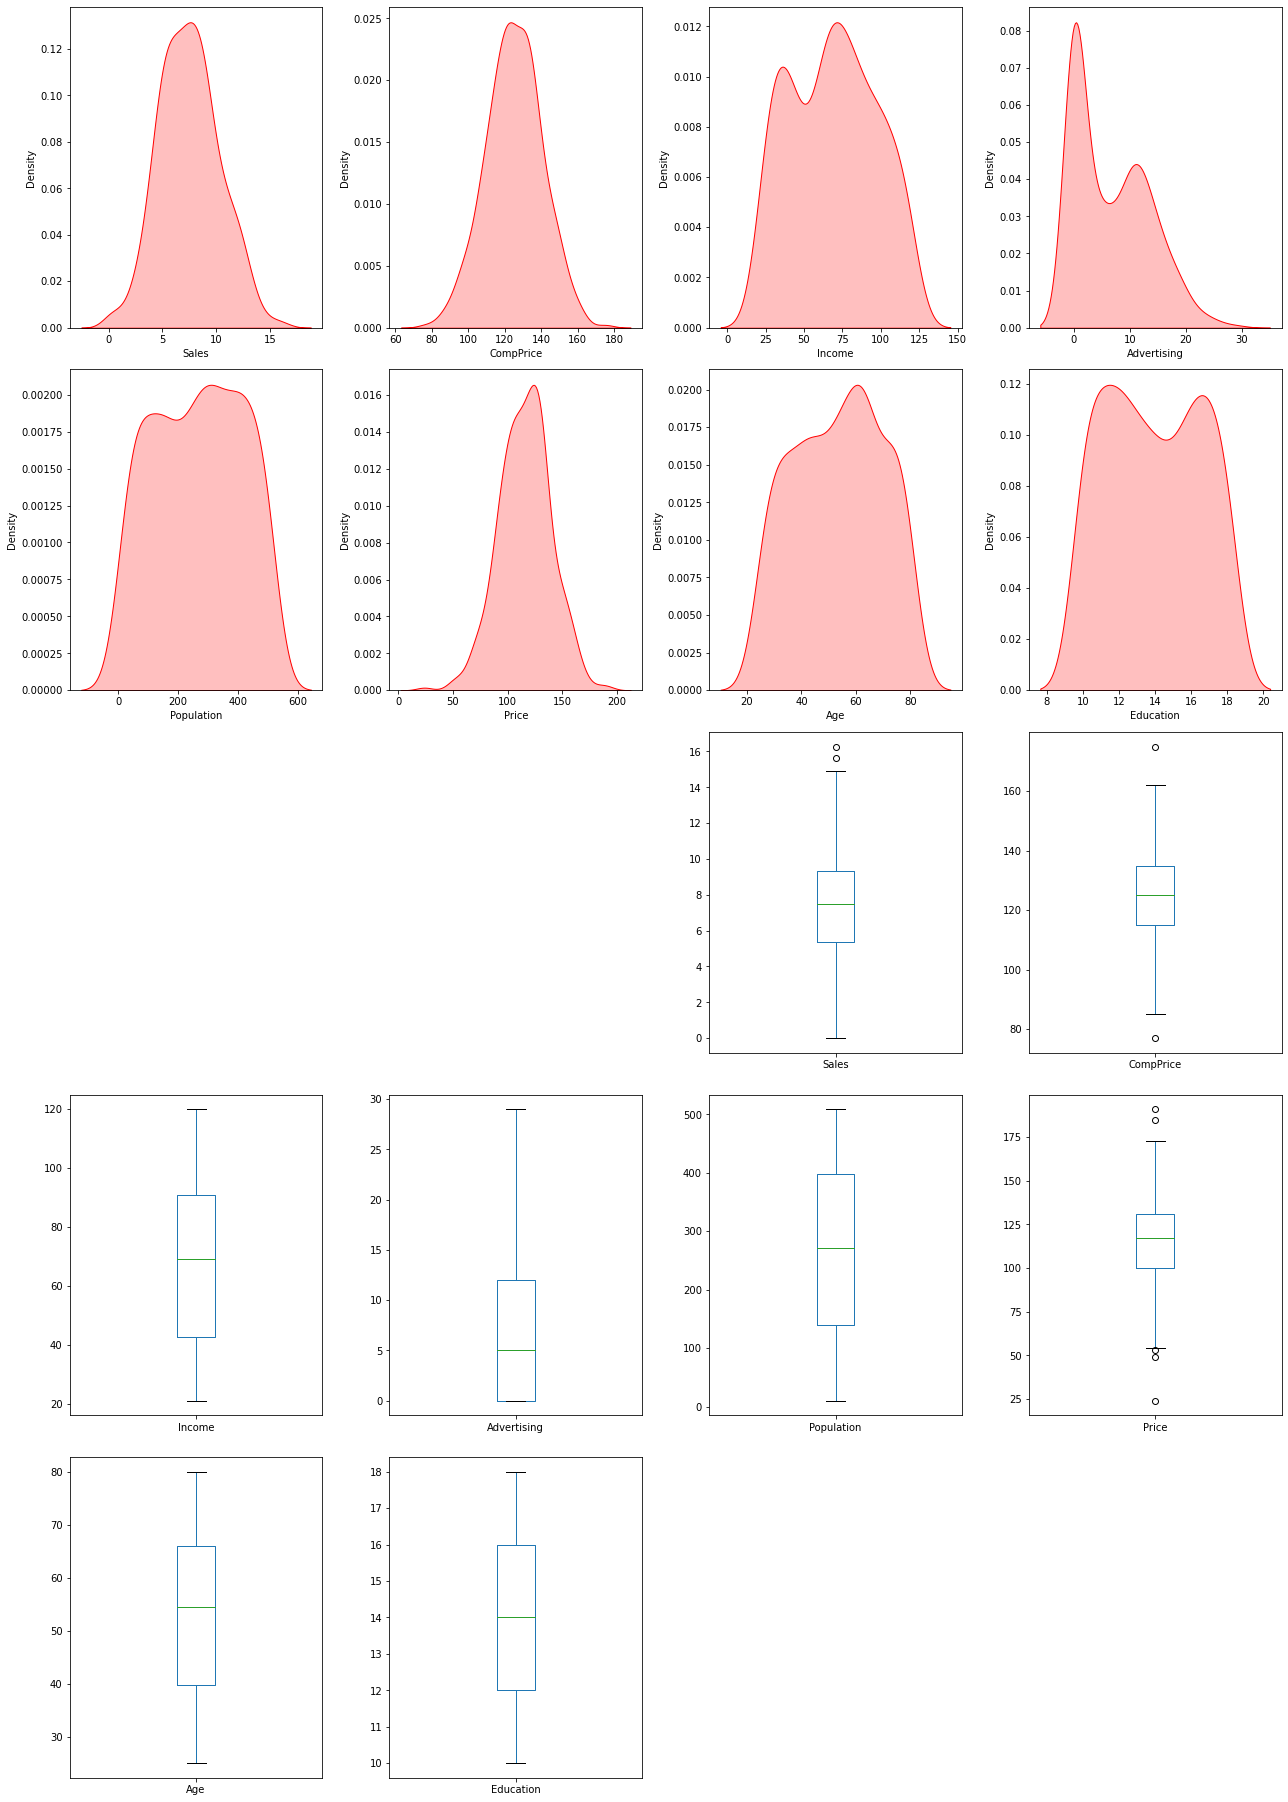

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company[col],color='r',shade=True)
    plt.subplot(8,4,i+10)
    company[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = company[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [17]:
company1 = pd.get_dummies(company1, columns = ['ShelveLoc','Urban','US'])
corr = company1.corr()

<AxesSubplot:>

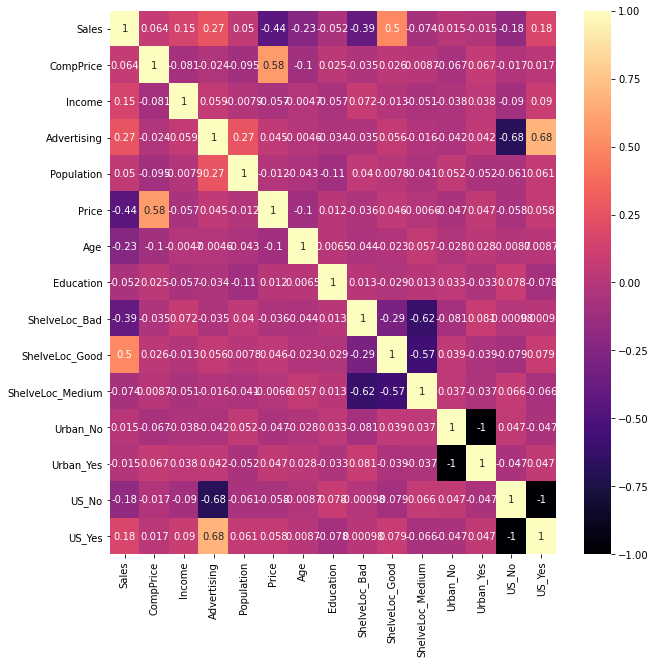

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='magma')

# Random Forest Model

 Here target variable is continious, we create a class of the value based on the mean

<= 7.49 == "Small" and > 7.49 == "large"

In [19]:
company1["sales"]="small"
company1.loc[company1["Sales"]>7.49,"sales"]="large"
company1.drop(["Sales"],axis=1,inplace=True)

X = company1.iloc[:, 0:14]
y = company1.iloc[:, 14]

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train.value_counts()

large    162
small    158
Name: sales, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier as RF

model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.784375

In [22]:
from sklearn.metrics import accuracy_score

pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

1.0

In [23]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.85

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_train)

array([[162,   0],
       [  0, 158]], dtype=int64)

In [25]:
company_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
company_t

,Actual,Predicted
233,large,large
109,large,large
322,large,large
55,small,small
240,large,large
...,...,...
96,large,large
98,large,large
49,large,large
350,large,large


In [26]:
!pip install pydotplus

In [27]:
!pip install graphviz

In [28]:
from io import StringIO
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
import pydotplus
import matplotlib.image as mpimg 

cols = list(company1.columns)
predictors = cols[0:14]
target = cols[-1]

tree1 = model.estimators_[20]
dot_data = StringIO()

export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('company_full.png')

True

Therefore, the accuracy of the Training set is 100% we test the accurancy on the test data also 100%


In [29]:
rf_small = RF(n_estimators=10, max_depth = 3)
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [30]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('company_small.png')

True

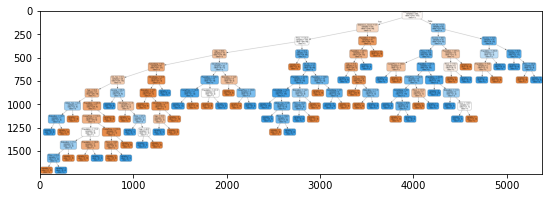

In [31]:
img = mpimg.imread('company_small.png') 
plt.imshow(img)

In [32]:
model.feature_importances_

array([0.11415374, 0.1102434 , 0.09194826, 0.09013601, 0.22500207,
       0.13713796, 0.06184889, 0.0329611 , 0.06978297, 0.02094781,
       0.01163491, 0.01204291, 0.00993797, 0.01222198])

In [33]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.225002
5,Age,0.137138
0,CompPrice,0.114154
1,Income,0.110243
2,Advertising,0.091948
3,Population,0.090136
8,ShelveLoc_Good,0.069783
6,Education,0.061849
7,ShelveLoc_Bad,0.032961
9,ShelveLoc_Medium,0.020948


Therefore we can  conclude that price is most important factor

# 2.FRAUD CHECK Dataset

In [34]:
f_check = pd.read_csv('Fraud_check.csv')
f_check1 = f_check.copy()
f_check1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [35]:
f_check1.shape

(600, 6)

In [36]:
f_check1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [37]:
f_check1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [38]:
f_check1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [39]:
f_check1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

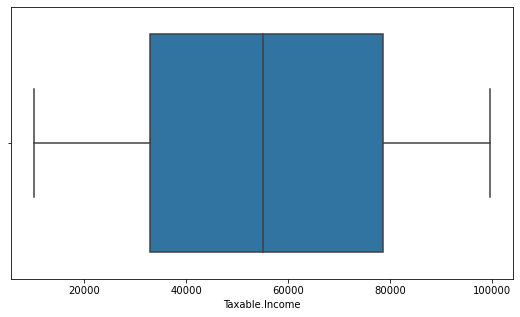

In [40]:
#Check for outliers
ax = sns.boxplot(f_check1['Taxable.Income'])

Here is no outliers

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


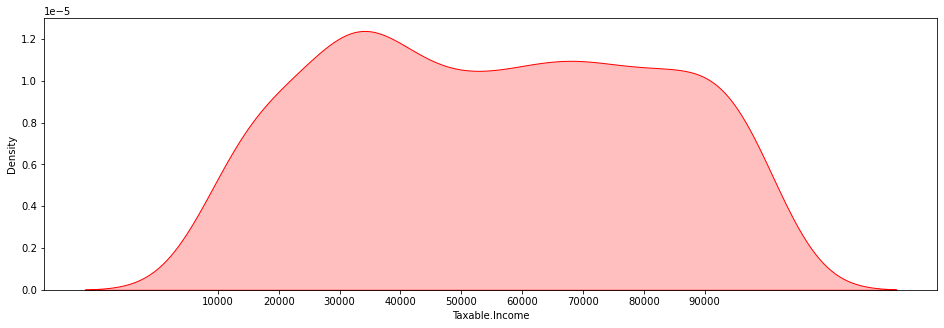

In [41]:
plt.rcParams["figure.figsize"] = 9,5

plt.figure(figsize=(16,5))
print("Skew: {}".format(f_check1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(f_check1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(f_check1['Taxable.Income'],shade=True,color='r')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skewed on the right, the data has negative Kurtosis

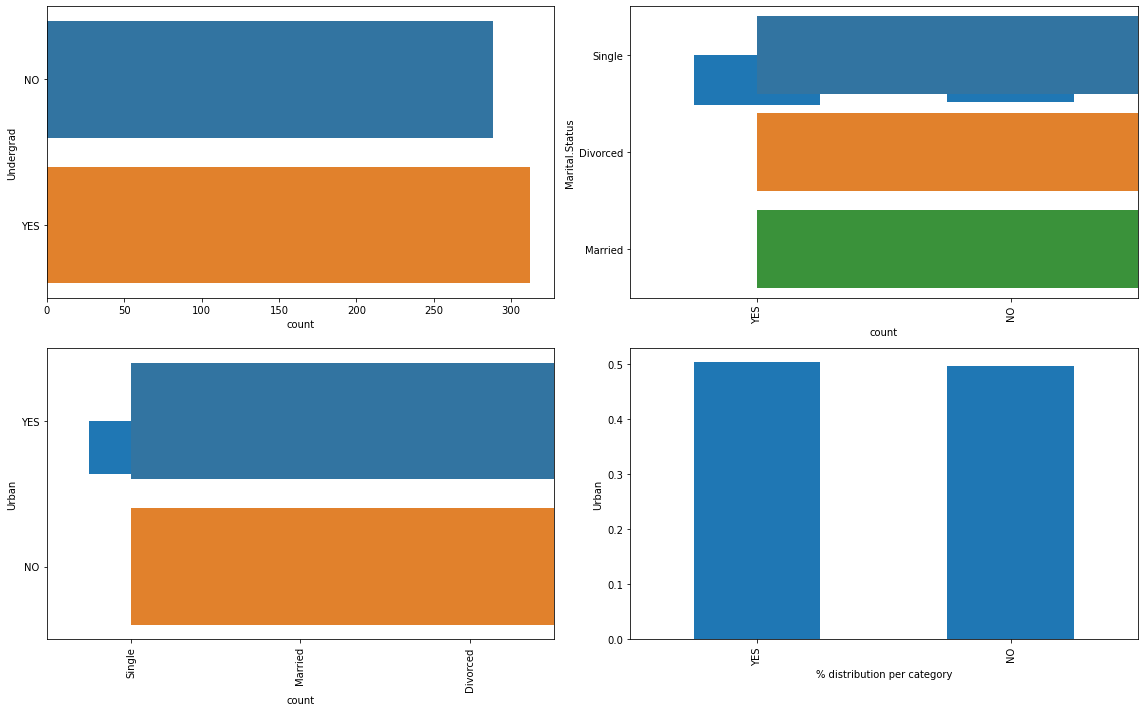

In [42]:
obj_colum = f_check1.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=f_check1,y=col)
    plt.subplot(2,2,i+1)
    f_check1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
    
plt.tight_layout()
plt.show()  

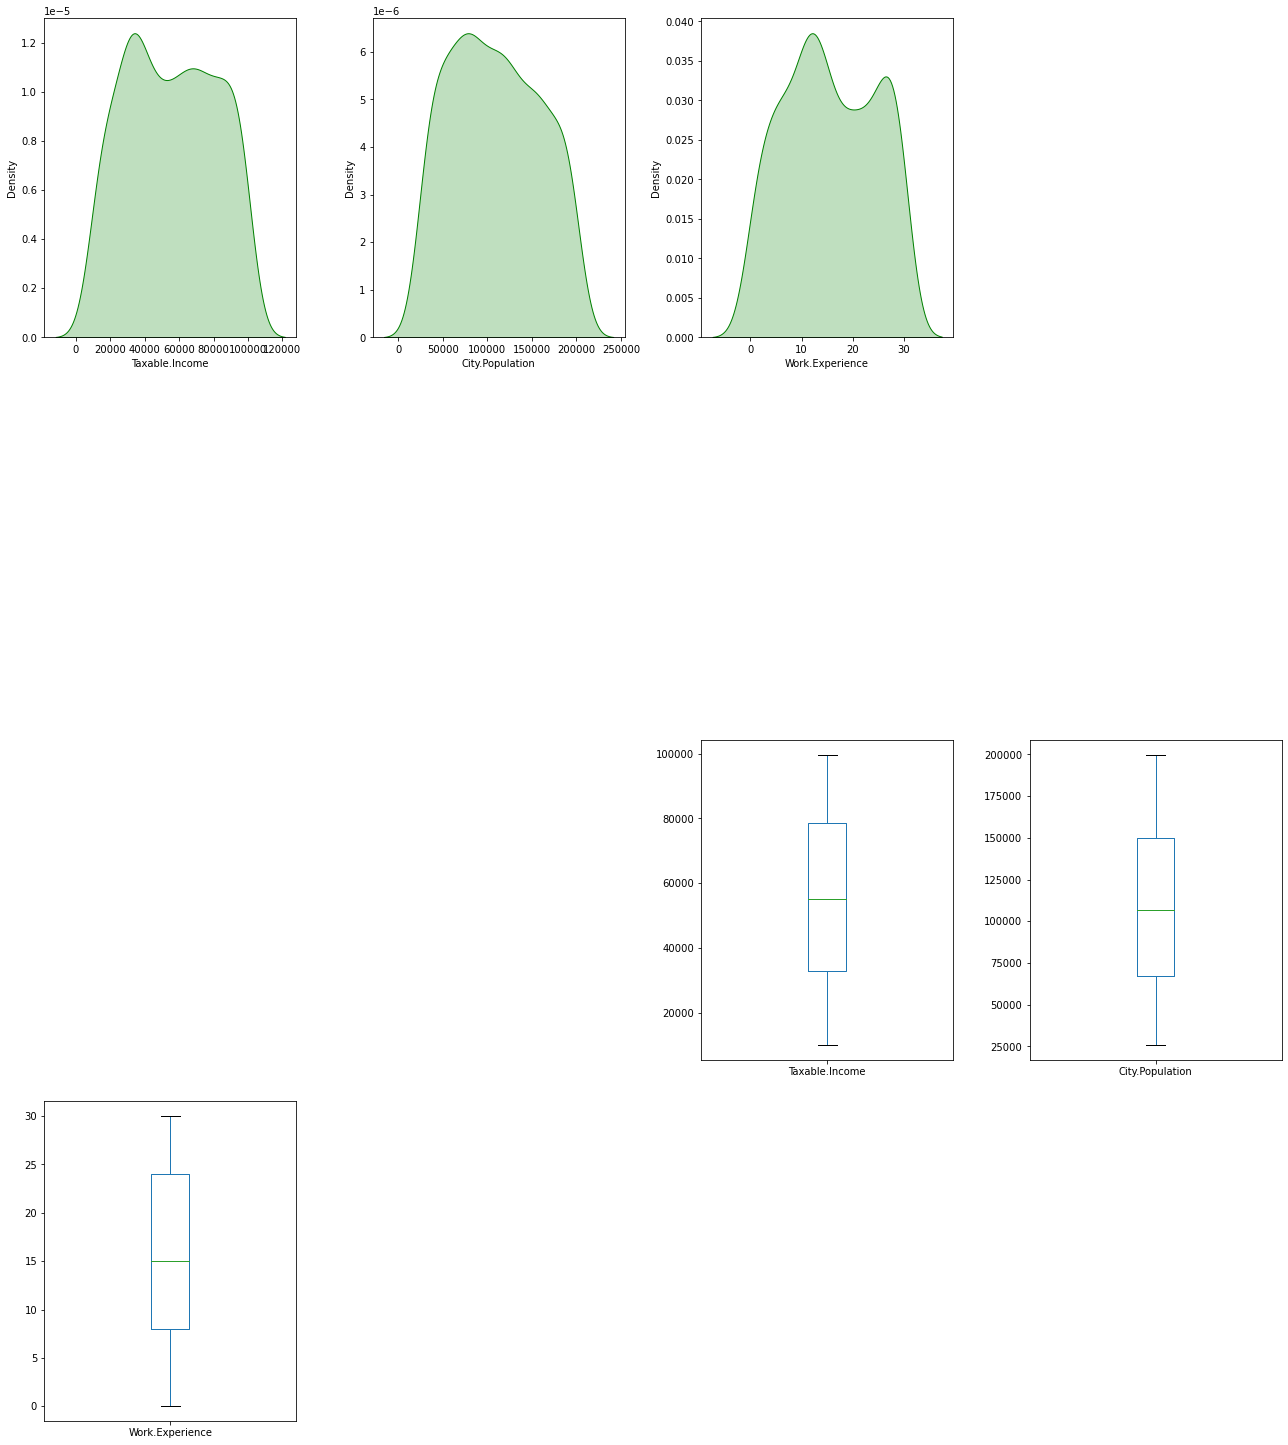

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [43]:
num_columns = f_check1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(f_check[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    f_check[col].plot.box()
    
plt.tight_layout() 
plt.show()

num_data = f_check[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

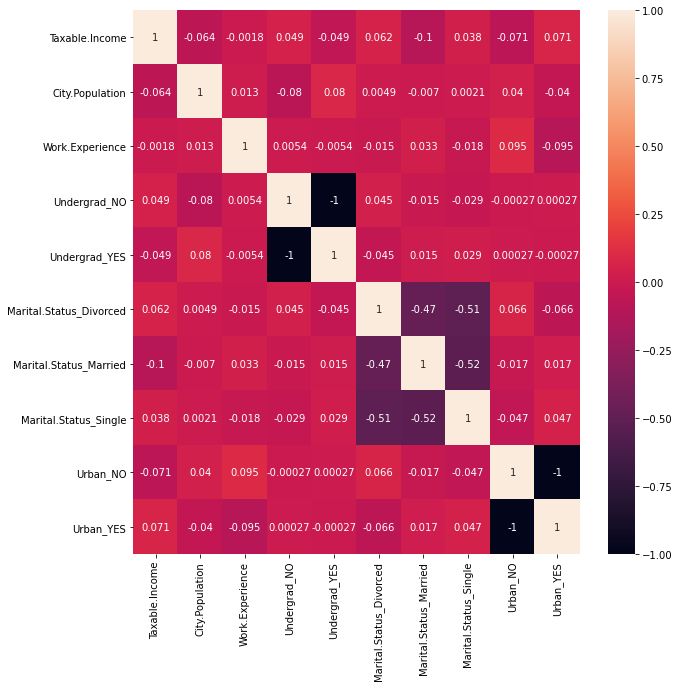

In [44]:
f_check1 = pd.get_dummies(f_check1, columns = ['Undergrad','Marital.Status','Urban'])

corr = f_check1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Random Forest Model

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [45]:
f_check1['Taxable.Income']=pd.cut(f_check1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])
list(f_check1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [46]:
X = f_check1.iloc[:,1:10]
y = f_check1.iloc[:,0]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train.value_counts()

good     383
risky     97
Name: Taxable.Income, dtype: int64

In [47]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.74375

In [48]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

1.0

In [49]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7083333333333334

In [50]:
confusion_matrix(y_test,pred_test)

array([[85,  8],
       [27,  0]], dtype=int64)

In [51]:
f_check1_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
f_check1_t

,Actual,Predicted
555,good,good
536,good,good
246,good,good
208,good,good
292,risky,good
...,...,...
454,good,good
403,good,good
315,risky,good
115,good,good


In [52]:
cols = list(f_check1.columns)

predictors = cols[1:10]
target = cols[0]

tree1 = model.estimators_[20]
dot_data = StringIO()

export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_full.png')

True

so we can  conclude that accuracy of the Training set is 100% we test the accurancy on the test data which is 72%

In [53]:
rf_small = RF(n_estimators=10, max_depth = 3)
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [54]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_small.png')

True

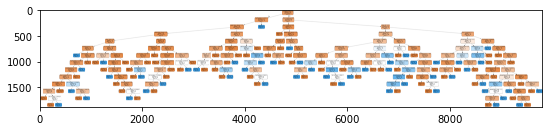

In [55]:
img = mpimg.imread('fraud_small.png') 
plt.imshow(img)

In [56]:
model.feature_importances_

array([0.52192073, 0.34558725, 0.01789996, 0.01721795, 0.01938187,
       0.02103797, 0.01799605, 0.01969816, 0.01926007])

In [57]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
0,City.Population,0.521921
1,Work.Experience,0.345587
5,Marital.Status_Married,0.021038
7,Urban_NO,0.019698
4,Marital.Status_Divorced,0.019382
8,Urban_YES,0.019260
6,Marital.Status_Single,0.017996
2,Undergrad_NO,0.017900
3,Undergrad_YES,0.017218


Finally we can say that city population is the important factor